In [1]:
import numpy as np,pandas as pd,matplotlib.pyplot as plt,seaborn as sns

In [58]:
data=pd.read_csv('AAPL.csv')
# Create moving averages
data['MA10'] = data['Close'].rolling(window=10).mean()
data['MA20'] = data['Close'].rolling(window=20).mean()


In [59]:
# Fill missing values
data = data.fillna(method='bfill')


In [60]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,MA10,MA20
0,2023-05-18,173.000000,175.240005,172.580002,175.050003,174.125275,65496700,175.086999,178.351
1,2023-05-19,176.389999,176.389999,174.940002,175.160004,174.234695,55772400,175.086999,178.351
2,2023-05-22,173.979996,174.710007,173.449997,174.199997,173.279755,43570900,175.086999,178.351
3,2023-05-23,173.130005,173.380005,171.279999,171.559998,170.653717,50747300,175.086999,178.351
4,2023-05-24,171.089996,172.419998,170.520004,171.839996,170.932220,45143500,175.086999,178.351


In [61]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,MA10,MA20
247,2024-05-13,185.440002,187.100006,184.619995,186.279999,186.279999,72044800,179.679002,174.033001
248,2024-05-14,187.509995,188.300003,186.289993,187.429993,187.429993,52393600,181.389002,174.935500
249,2024-05-15,187.910004,190.649994,187.369995,189.720001,189.720001,70400000,183.431001,176.021500
250,2024-05-16,190.470001,191.100006,189.660004,189.839996,189.839996,52845200,185.112001,177.161501
251,2024-05-17,189.509995,190.809998,189.179993,189.869995,189.869995,41260800,185.761000,178.405000


In [62]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
MA10         0
MA20         0
dtype: int64

In [63]:
df=data.reset_index()['Close']#It resets the index of the DataFrame "data" and then selects the 'Close' column, resulting in a Series of 'Close' prices with a default integer index.

In [64]:
df[122:]

122    186.399994
123    184.800003
124    187.440002
125    188.009995
126    189.710007
          ...    
247    186.279999
248    187.429993
249    189.720001
250    189.839996
251    189.869995
Name: Close, Length: 130, dtype: float64

In [65]:
df.shape

(252,)

In [66]:
df[1:]

1      175.160004
2      174.199997
3      171.559998
4      171.839996
5      172.990005
          ...    
247    186.279999
248    187.429993
249    189.720001
250    189.839996
251    189.869995
Name: Close, Length: 251, dtype: float64

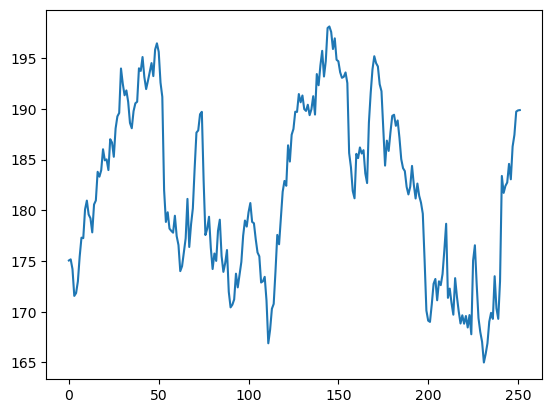

In [67]:
plt.plot(df)#how your stock price looks from 2023 to 2024

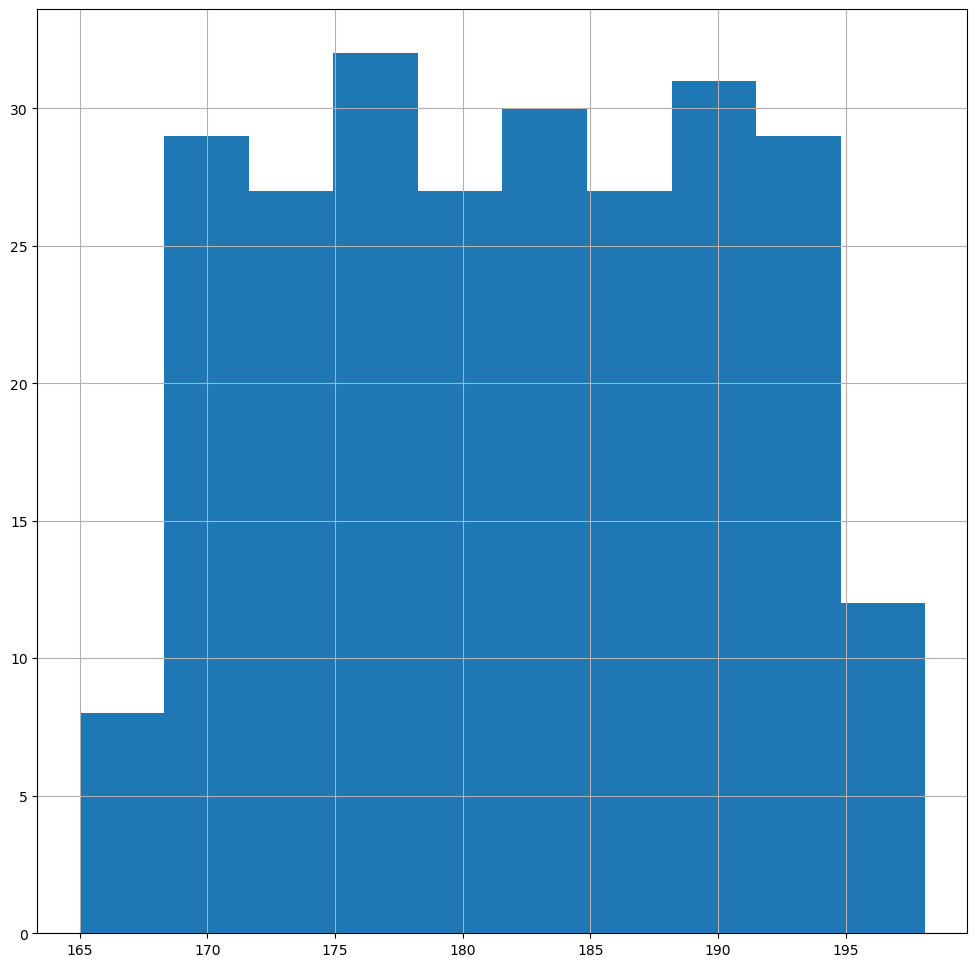

In [69]:
df.hist(figsize=(12, 12));

## LSTM are sensitive to the scale of data. so here we apply minmax scale.

In [112]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [113]:
df

0      175.050003
1      175.160004
2      174.199997
3      171.559998
4      171.839996
          ...    
247    186.279999
248    187.429993
249    189.720001
250    189.839996
251    189.869995
Name: Close, Length: 252, dtype: float64

In [114]:
scaled_data=scaler.fit_transform(np.array(df).reshape(-1,1))#we change df into an array

In [115]:
scaled_data

array([[0.30353376],
       [0.30685605],
       [0.27786157],
       [0.19812739],
       [0.20658399],
       [0.24131697],
       [0.31501035],
       [0.37148906],
       [0.36997885],
       [0.45575341],
       [0.48172747],
       [0.44035039],
       [0.42917567],
       [0.3871944 ],
       [0.47025088],
       [0.4820298 ],
       [0.56750204],
       [0.55300506],
       [0.57233453],
       [0.63455132],
       [0.60163085],
       [0.60434897],
       [0.57263686],
       [0.66445181],
       [0.65478684],
       [0.61220185],
       [0.69646624],
       [0.73240711],
       [0.74267579],
       [0.87496225],
       [0.82935688],
       [0.79522806],
       [0.80972507],
       [0.77559626],
       [0.71307763],
       [0.69707041],
       [0.74811245],
       [0.77136793],
       [0.77589856],
       [0.87556642],
       [0.86771353],
       [0.90909106],
       [0.84959239],
       [0.8136515 ],
       [0.83811535],
       [0.86439125],
       [0.89096947],
       [0.852

In [116]:
## split the data into train and test
X=int(len(df)*0.65)#training_size
y=len(df)-X#test_size

In [117]:
train_data = scaled_data[:X]
test_data = scaled_data[y:]

## now converting array of values into a dataset matrix

In [118]:
#in the below code we just taking the value from dataset to set them for train and test here we take 4 continuous value to predict the 5th value 
def create_dataset(dataset,time_step=60):
    dataX,dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]#i=0,  0,1,2,3
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX),np.array(dataY)

In [119]:
# reshape into X=t, t+1,t+2,t+3 and t+4
time_step=100 # number of value taken from the data 
X_train,y_train=create_dataset(train_data,time_step)
X_test,y_test=create_dataset(test_data,time_step)

In [120]:
X_train

array([[0.30353376, 0.30685605, 0.27786157, ..., 0.37722756, 0.4225311 ,
        0.4044095 ],
       [0.30685605, 0.27786157, 0.19812739, ..., 0.4225311 , 0.4044095 ,
        0.44699494],
       [0.27786157, 0.19812739, 0.20658399, ..., 0.4044095 , 0.44699494,
        0.47447921],
       ...,
       [0.43672626, 0.37601923, 0.34944146, ..., 0.62337657, 0.58139533,
        0.51072194],
       [0.37601923, 0.34944146, 0.27182119, ..., 0.58139533, 0.51072194,
        0.48867389],
       [0.34944146, 0.27182119, 0.2866205 , ..., 0.51072194, 0.48867389,
        0.62096036]])

In [121]:
X_test.shape,X_train.shape


((62, 100), (62, 100))

In [122]:
y_test.shape,y_train.shape

((62,), (62,))

## reshape X_train and test for the LSTM reshape will be[samples,time steps,features]

In [123]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1) # reshape data into three dimensions
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [124]:
X_train.shape

(62, 100, 1)

In [125]:
X_test

array([[[0.2102086 ],
        [0.16399858],
        [0.17185146],
        ...,
        [0.57837491],
        [0.56961644],
        [0.5228027 ]],

       [[0.16399858],
        [0.17185146],
        [0.18755684],
        ...,
        [0.56961644],
        [0.5228027 ],
        [0.50015094]],

       [[0.17185146],
        [0.18755684],
        [0.26427061],
        ...,
        [0.5228027 ],
        [0.50015094],
        [0.523105  ]],

       ...,

       [[0.96466328],
        [0.90093631],
        [0.89640568],
        ...,
        [0.5910603 ],
        [0.5451526 ],
        [0.64270608]],

       [[0.90093631],
        [0.89640568],
        [0.86378753],
        ...,
        [0.5451526 ],
        [0.64270608],
        [0.67743861]],

       [[0.89640568],
        [0.86378753],
        [0.84717614],
        ...,
        [0.64270608],
        [0.67743861],
        [0.74660224]]])

In [126]:
# Install TensorFlow
#%pip install tensorflow


In [127]:
## NOW CREATINE LSTM MODEL
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

In [128]:

'''model = Sequential()
model.add(LSTM(62, return_sequences=True, input_shape=(100, 1)))  # Assuming input sequence length of 100 and input dimension of 1
model.add(Dropout(0.2))
model.add(LSTM(62, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(62, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1),activation='relu')

model.compile(optimizer='adam', loss='mse')#specify the optimizer and loss function.
model.compile(loss='mean_squared_error',optimizer='adam')'''
model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])
model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

In [129]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 64)                  │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,065 (78.38 KB)

 Trainable params: 20,065 (78.38 KB)

 Non-trainable params: 0 (0.00 B)

In [141]:
model.fit(X_train,y_train,epochs=100,batch_size=64,validation_data=(X_test,y_test),validation_split=0.2,verbose=1)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 0.0071 - mean_absolute_error: 0.0693 - val_loss: 0.0093 - val_mean_absolute_error: 0.0765
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.0068 - mean_absolute_error: 0.0674 - val_loss: 0.0095 - val_mean_absolute_error: 0.0765
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.0068 - mean_absolute_error: 0.0675 - val_loss: 0.0097 - val_mean_absolute_error: 0.0767
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.0070 - mean_absolute_error: 0.0681 - val_loss: 0.0096 - val_mean_absolute_error: 0.0765
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.0069 - mean_absolute_error: 0.0675 - val_loss: 0.0094 - val_mean_absolute_error: 0.0761
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.0066 - mean_absolute_error: 0.0668 - val_loss: 0.0092 - val_mean_absolute_error: 0.0761
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.0067 - mean_absolute_error: 0.0665 - val_loss: 0.00

In [131]:
model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 440ms/step - loss: 0.4368 - mean_absolute_error: 0.6068 - val_loss: 0.1153 - val_mean_absolute_error: 0.2784
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.4001 - mean_absolute_error: 0.5823 - val_loss: 0.1011 - val_mean_absolute_error: 0.2560
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.3691 - mean_absolute_error: 0.5576 - val_loss: 0.0848 - val_mean_absolute_error: 0.2260
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.3183 - mean_absolute_error: 0.5200 - val_loss: 0.0654 - val_mean_absolute_error: 0.1879
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.2407 - mean_absolute_error: 0.4437 - val_loss: 0.0466 - val_mean_absolute_error: 0.1526
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.1750 - mean_absolute_error: 0.3726 - val_loss: 0.0328 - val_mean_absolute_error: 0.1364
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1054 - mean_absolute_error: 0.2834 - val_loss: 0.03

In [142]:
## now predicting the model and check performance matrix
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [143]:
## transform back to original value because we have to find the RMSE value
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [144]:
import math
from sklearn.metrics import mean_squared_error,mean_absolute_error
math.sqrt(mean_squared_error(y_train,train_predict))

185.8543731535284

In [145]:
##on test data
math.sqrt(mean_squared_error(y_test,test_predict))

176.44481249584962

## here you see the differnce between train RMSE and test RMSE are very less,so it means our LSTM model done a great job



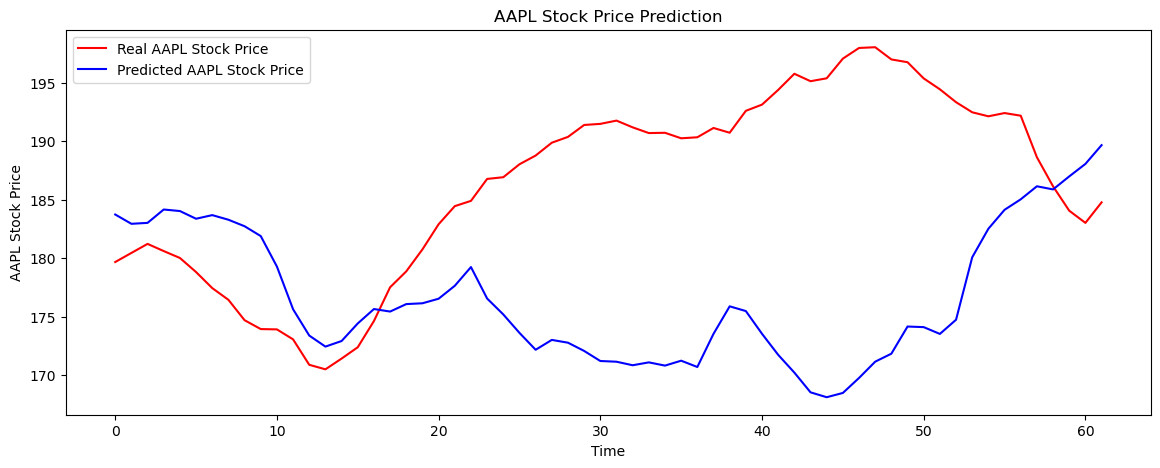

In [146]:
 ##Plot the results
plt.figure(figsize=(14, 5))
plt.plot(train_predict, color='red', label='Real AAPL Stock Price')
plt.plot(test_predict, color='blue', label='Predicted AAPL Stock Price')
plt.title('AAPL Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('AAPL Stock Price')
plt.legend()
plt.show()

In [147]:
mse = mean_squared_error(train_predict, test_predict)
mae = mean_absolute_error(train_predict, test_predict)

In [148]:
mse

225.0464

In [149]:
mae

12.225359